Below Link for Titanic Data set:

https://www.kaggle.com/c/titanic


In [1]:
#Set up the Titanic csv file as a DataFrame
import pandas as pd
from pandas import Series,DataFrame
titanic_df = pd.read_csv('train.csv')

#preview of the data
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
#overall info for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [3]:
#First we will start with examining the different kinds of passengers on the titanic
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

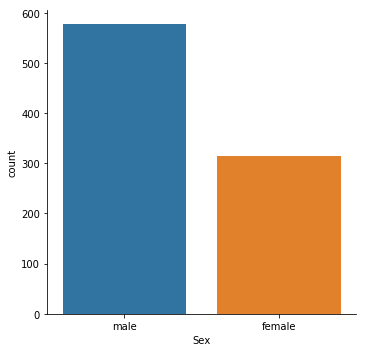

In [4]:
#Getting an idea of the Gender ratio
sns.catplot('Sex',data=titanic_df, kind='count')

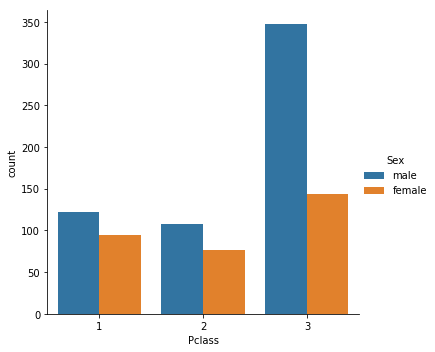

In [5]:
#Seperating the genders by classes
sns.catplot('Pclass',data=titanic_df,hue='Sex', kind = 'count')

Now to go further we will want to include whether the individuals were children or not.

In [6]:
#function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

In [7]:
#Creating a new column called 'person'
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [8]:
#Confirming additional column was added
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


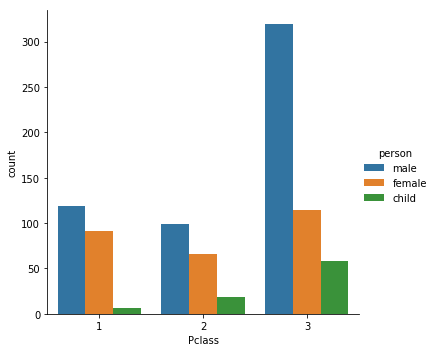

In [9]:
#Information on Passengers by Passenger Class/Type of Person
sns.catplot('Pclass',data=titanic_df,hue='person',kind='count')

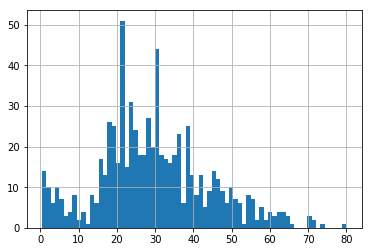

In [10]:
#Histogram of Age
titanic_df['Age'].hist(bins=70)

In [11]:
#Overall comparison of male,female,child
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

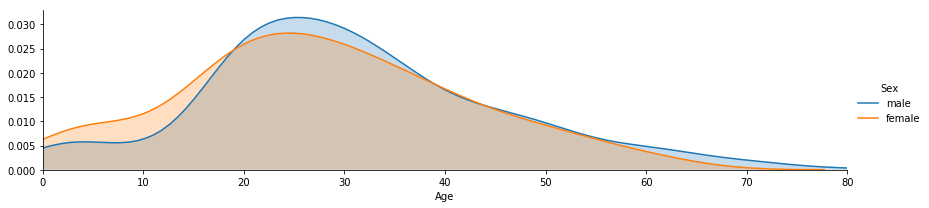

In [12]:
#Multiple KDEplots on one plot
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)
# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))

#Adding a legend
fig.add_legend()

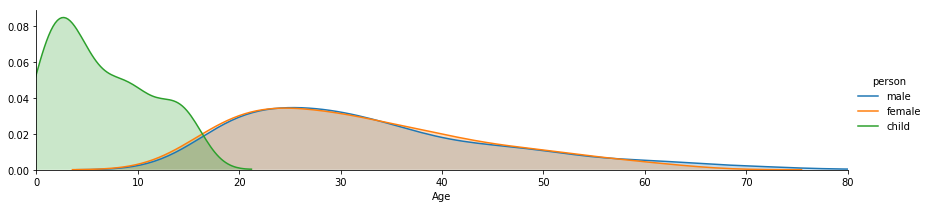

In [13]:
#Same thing for the 'person' column but now we include children:
fig = sns.FacetGrid(titanic_df, hue="person",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

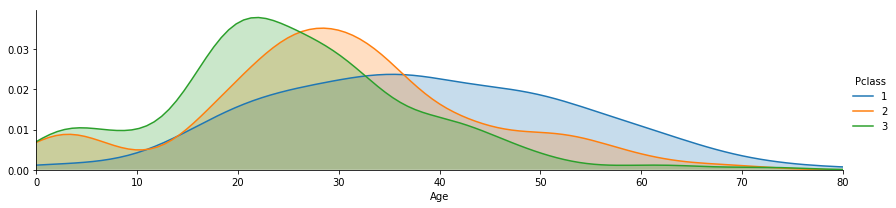

In [14]:
#Same for Passenger class
fig = sns.FacetGrid(titanic_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()


We've gotten a pretty good examination of the passengers based on Sex, Age, and Class

In [15]:
#Now lets try to draw comparisons on how the decks passengers were on related to their Pclass
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [16]:
#Drop the NaN values and create a new object, deck
deck = titanic_df['Cabin'].dropna()

In [17]:
#Preview of the decks
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

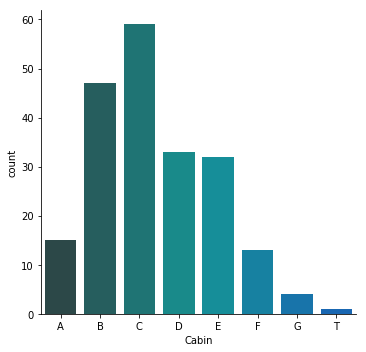

In [18]:
#Getting the letter for the deck level
levels = []

for level in deck:
    levels.append(level[0])    
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin',data=cabin_df,palette='winter_d',kind='count',order=['A','B','C','D','E','F','G','T'])

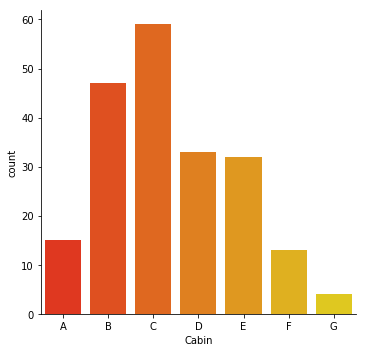

In [19]:
#Dropping the 'T' deck
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.catplot('Cabin',data=cabin_df,palette='autumn',kind='count',order=['A','B','C','D','E','F','G'])

In [20]:
#Now we can also look to see where the passengers came from
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


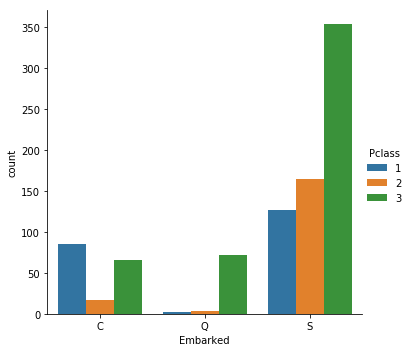

In [21]:
#Embarked column has C,Q,and S values. On Kaggle you'll note that these stand for Cherbourg, Queenstown, Southhampton.
#Plot
sns.catplot('Embarked',data=titanic_df,hue='Pclass',kind='count',order=['C','Q','S'])

In Queenstown, almost all the passengers that boarded were 3rd class. From this we could look at the economics of that town in that time period for further investigation.

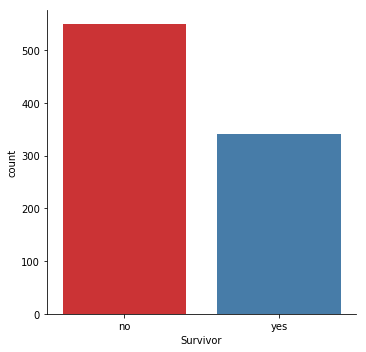

In [22]:
#Now to see what factors helped someone to survive
titanic_df["Survivor"] = titanic_df.Survived.map({0: "no", 1: "yes"})

#Plot of survied vs died. 
sns.catplot('Survivor',data=titanic_df,palette='Set1',kind='count')

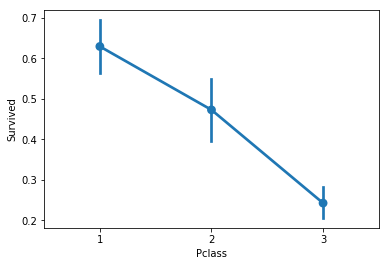

In [23]:
#Now checking to see if the class of passengers had an impact on their survival rate
sns.pointplot(x='Pclass',y='Survived',data=titanic_df)

Survival rates for the 3rd class are substantially lower.
Now I will check to see if this is in part by the large amount of men in 3rd class(in addition to Women and children first policy)

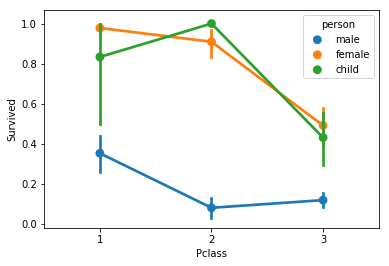

In [24]:
#Plot including class and gender
sns.pointplot(x='Pclass',y='Survived',hue='person',data=titanic_df)

From this data it looks like being a male or being in 3rd class were both not favourable for survival. 

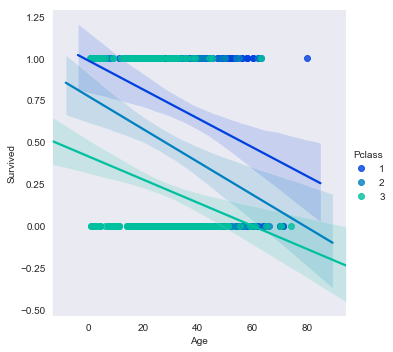

In [25]:
#Age versus survival using hue for class seperation
sns.set_style('dark')
sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter')

Here we see there is a general trend that the older the passenger was, the less likely they survived.